# FlameStream workers scalability comparision

In [1]:
require(data.table)

Loading required package: data.table


In [61]:
fs.1w <- tail(scan("fs-1w.data", sep = ","), -200) / 1e6
fs.2w <- tail(scan("fs-2w.data", sep = ","), -200) / 1e5
fs.5w <- tail(scan("fs-5w.data", sep = ","), -200) / 1e6
fs.7w <- tail(scan("fs-7w.data", sep = ","), -200) / 1e6
fs.10w <- tail(scan("fs-10w.data", sep = ","), -200) / 1e6

In [62]:
summary(fs.1w)
summary(fs.2w)
summary(fs.5w)
summary(fs.7w)
summary(fs.10w)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.813  19.240  26.490  31.280  36.480 941.800 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    26.32    218.80    290.20   1755.00    486.20 154000.00 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   4.591   23.950   30.520   43.750   45.310 1845.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.175  24.720  30.780  40.670  42.840 483.400 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.909  25.930  31.980  41.140  43.870 389.100 

In [63]:
quntiles <- seq(1, length(fs.1w)) / length(fs.1w)

In [64]:
quantile(fs.1w, p = 0.95)
quantile(fs.2w, p = 0.95)
quantile(fs.5w, p = 0.95)
quantile(fs.7w, p = 0.95)
quantile(fs.10w, p = 0.95)

95% 
65.89416

95% 
1418.289

95% 
102.7123

95% 
97.5631

95% 
93.85794

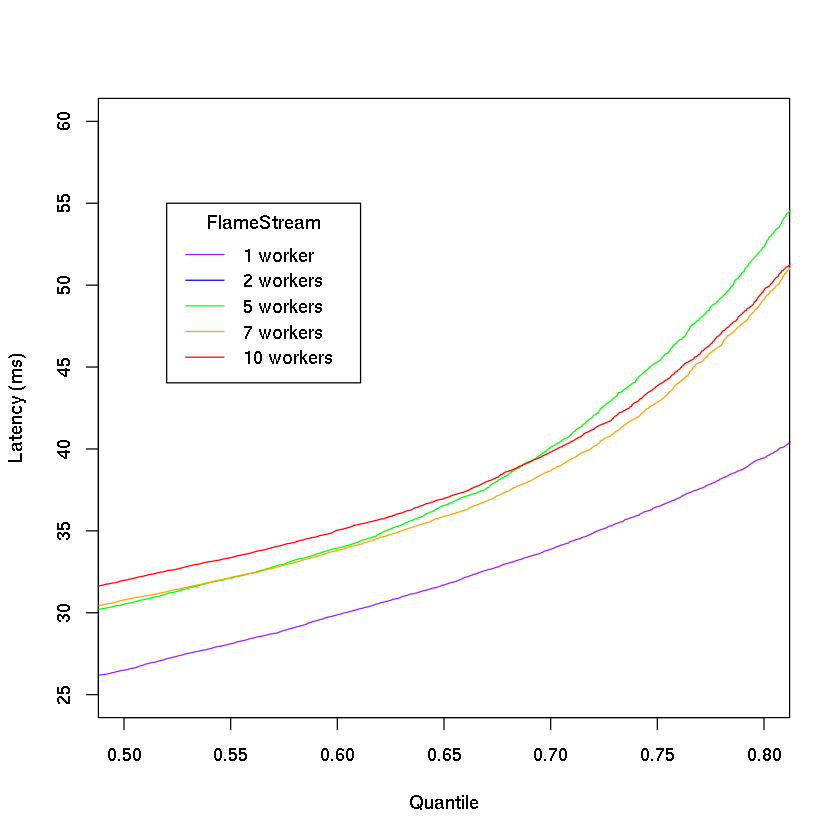

In [67]:
plot(quntiles, sort(fs.1w), type = "l", col = "purple", 
     xlim = c(0.5, 0.8), ylim = c(2.5e1, 6e1), 
     xlab = "Quantile", ylab = "Latency (ms)")
lines(quntiles, sort(fs.2w), col = "blue")
lines(quntiles, sort(fs.5w), col = "green")
lines(quntiles, sort(fs.7w), col = "orange")
lines(quntiles, sort(fs.10w), col = "red")
legend(0.52, 5.5e1, title = "FlameStream", 
       legend = c("1 worker", "2 workers", "5 workers", "7 workers", "10 workers"), 
       col = c("purple", "blue", "green", "orange", "red"), 
       lty=1)

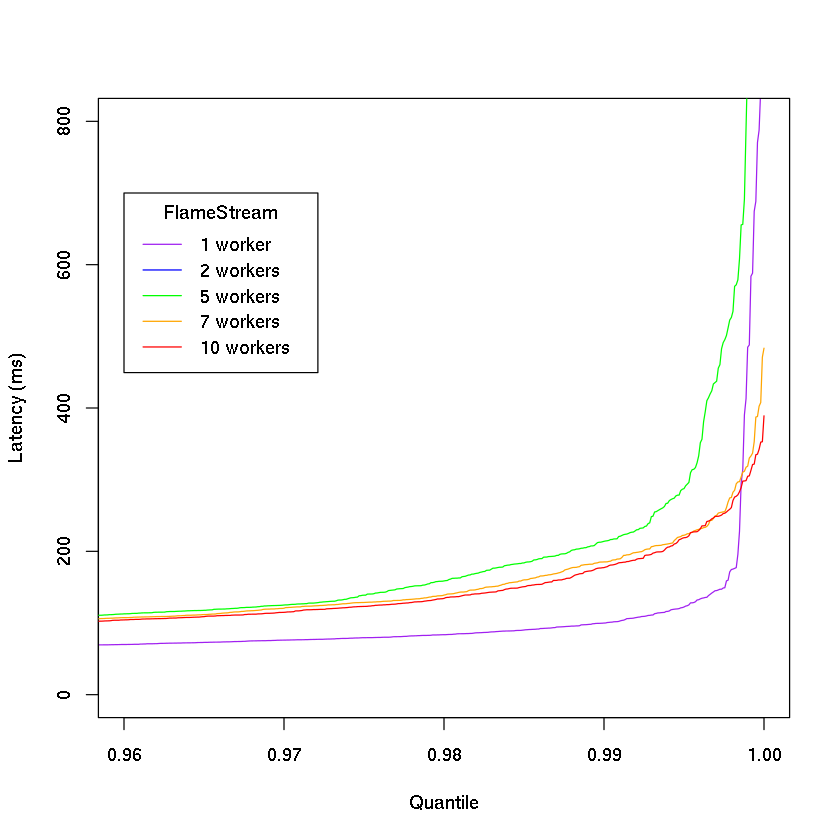

In [68]:
plot(quntiles, sort(fs.1w), type = "l", col = "purple", 
     xlim = c(0.96, 1), ylim = c(0, 8e2), 
     xlab="Quantile", ylab="Latency (ms)")
lines(quntiles, sort(fs.2w), col = "blue")
lines(quntiles, sort(fs.5w), col = "green")
lines(quntiles, sort(fs.7w), col = "orange")
lines(quntiles, sort(fs.10w), col = "red")
legend(0.96, 7e2, title = "FlameStream", 
       legend = c("1 worker", "2 workers", "5 workers", "7 workers", "10 workers"), 
       col = c("purple", "blue", "green", "orange", "red"), 
       lty = 1)

# FlameStream vs Flink quantiles

In [70]:
fl.1w <- tail(scan("fl-1w.data", sep=","), -200) / 1e6
fl.2w <- tail(scan("fl-2w.data", sep=","), -200) / 1e6
fl.5w <- tail(scan("fl-5w.data", sep=","), -200) / 1e6

In [71]:
summary(fl.1w)
summary(fl.2w)
summary(fl.5w)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.167  61.040 116.800 113.200 163.500 455.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.259  69.430 103.100 103.600 135.200 316.700 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.739  80.040 111.400 111.500 142.400 287.000 

In [72]:
quantile(fl.1w, p=0.95)
quantile(fl.2w, p=0.95)
quantile(fl.5w, p=0.95)

95% 
196.7695

95% 
178.9196

95% 
187.1398

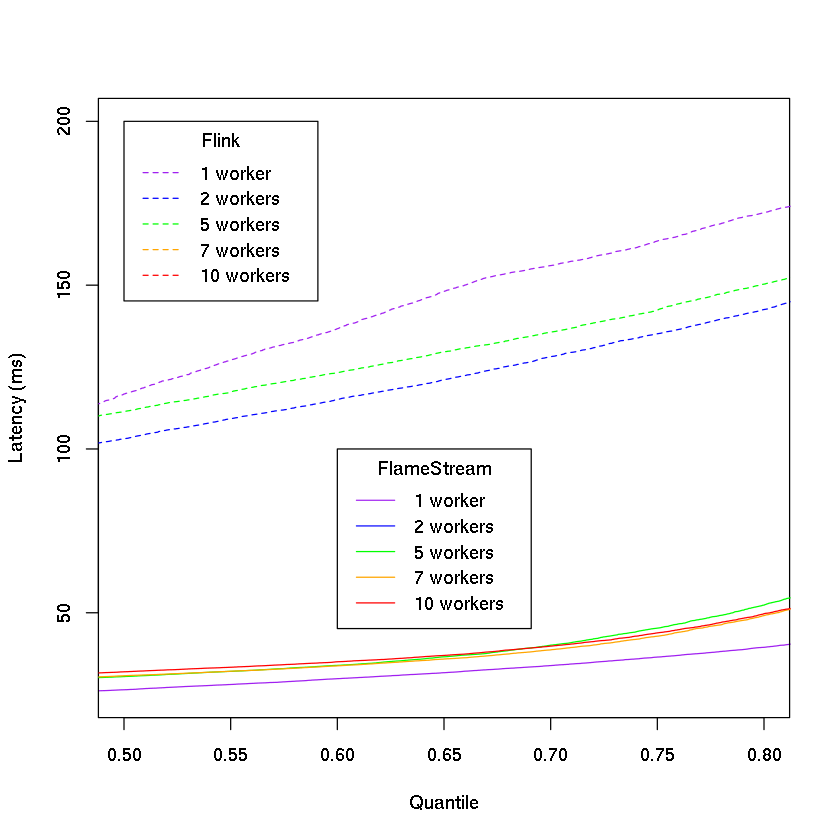

In [73]:
plot(quntiles, sort(fs.1w), type = "l", col = "purple", 
     xlim = c(0.5, 0.8), ylim = c(2.5e1, 2e2), 
     xlab = "Quantile", ylab = "Latency (ms)")
lines(quntiles, sort(fs.2w), col = "blue")
lines(quntiles, sort(fs.5w), col = "green")
lines(quntiles, sort(fs.7w), col = "orange")
lines(quntiles, sort(fs.10w), col = "red")
legend(0.6, 1e2, title = "FlameStream", 
       legend = c("1 worker", "2 workers", "5 workers", "7 workers", "10 workers"), 
       col = c("purple", "blue", "green", "orange", "red"), 
       lty=1)

lines(quntiles, sort(fl.1w), col = "purple", lty = 2)
lines(quntiles, sort(fl.2w), col = "blue", lty = 2)
lines(quntiles, sort(fl.5w), col = "green", lty = 2)
legend(0.5, 2e2, title = "Flink", 
       legend = c("1 worker", "2 workers", "5 workers", "7 workers", "10 workers"), 
       col = c("purple", "blue", "green", "orange", "red"), 
       lty=2)

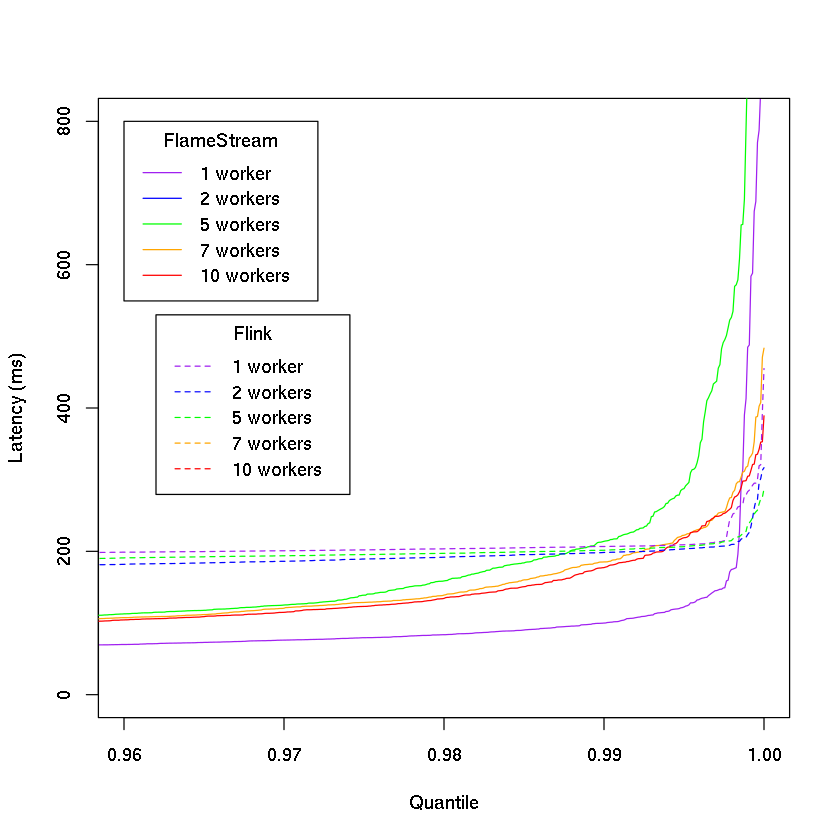

In [74]:
plot(quntiles, sort(fs.1w), type = "l", col = "purple", 
     xlim = c(0.96, 1), ylim = c(0, 8e2), 
     xlab="Quantile", ylab="Latency (ms)")
lines(quntiles, sort(fs.2w), col = "blue")
lines(quntiles, sort(fs.5w), col = "green")
lines(quntiles, sort(fs.7w), col = "orange")
lines(quntiles, sort(fs.10w), col = "red")
legend(0.96, 8e2, title = "FlameStream", 
       legend = c("1 worker", "2 workers", "5 workers", "7 workers", "10 workers"), 
       col = c("purple", "blue", "green", "orange", "red"), 
       lty = 1)

lines(quntiles, sort(fl.1w), col = "purple", lty = 2)
lines(quntiles, sort(fl.2w), col = "blue", lty = 2)
lines(quntiles, sort(fl.5w), col = "green", lty = 2)
legend(0.962, 5.3e2, title = "Flink", 
       legend = c("1 worker", "2 workers", "5 workers", "7 workers", "10 workers"), 
       col = c("purple", "blue", "green", "orange", "red"), 
       lty=2)

In [75]:
m <- matrix(c(quantile(fs.10w, p = 0.5),
        quantile(fs.10w, p = 0.95) - quantile(fs.10w, p = 0.5),
        quantile(fs.10w, p = 0.99) - quantile(fs.10w, p = 0.95),
        quantile(fl.5w, p = 0.5),
        quantile(fl.5w, p = 0.95) - quantile(fl.5w, p = 0.5),
        quantile(fl.5w, p = 0.99) - quantile(fl.5w, p = 0.95)), nrow=3)
colnames(m) <- c("FlameStream", "Flink")
rownames(m) <- c("50%", "95%", "99%")
m

,FlameStream,Flink
50%,31.98338,111.44280
95%,61.87457,75.69700
99%,83.44175,14.34854


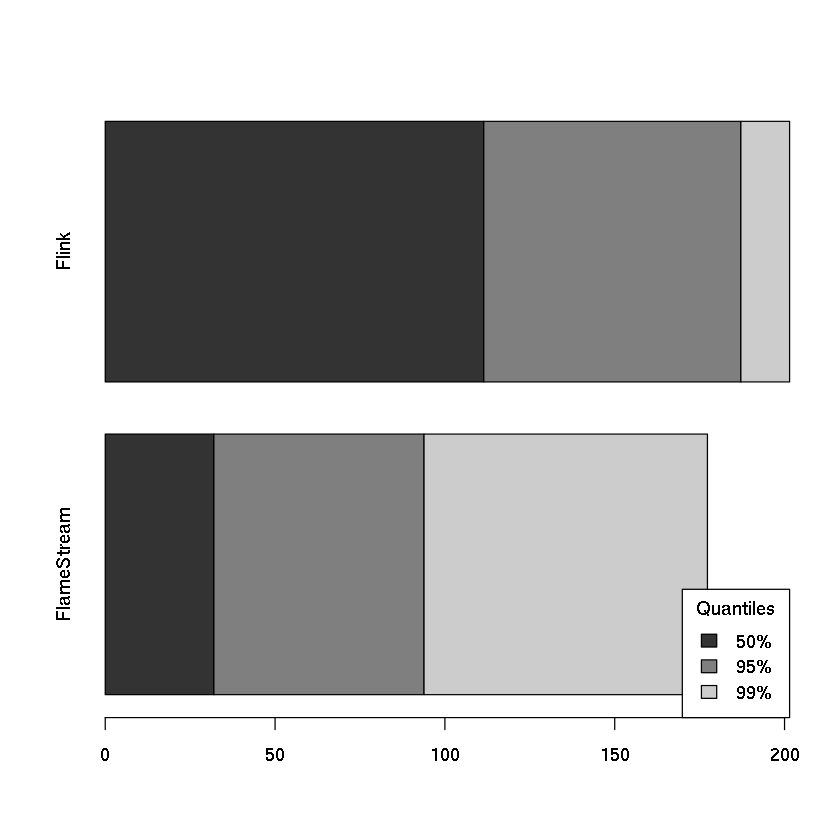

In [76]:
barplot(m, horiz = T, col = c("grey20", "grey50", "grey80"))
legend("bottomright",
       title = "Quantiles",
       legend = c("50%", "95%", "99%"), 
       fill = c("grey20", "grey50", "grey80"))